In [1]:
import matplotlib.pyplot as plt
from sksurv.linear_model import CoxPHSurvivalAnalysis
import numpy as np
import pandas as pd
from dataset_utils import load_dataset
from dataset_utils import preprocess_dataset
from sklearn.model_selection import train_test_split

In [2]:
dataset = load_dataset("whas500")
dataset = preprocess_dataset(dataset)
dataset

,afb,age,av3,bmi,chf,cvd,diasbp,gender,hr,los,miord,mitype,sho,sysbp,censorship,event_time
0,1,83.0,0,25.54051,0,1,78.0,0,89.0,5.0,1,0,0,152.0,False,2178.0
1,0,49.0,0,24.02398,0,1,60.0,0,84.0,5.0,0,1,0,120.0,False,2172.0
2,0,70.0,0,22.14290,0,0,88.0,1,83.0,5.0,0,1,0,147.0,False,2190.0
3,0,70.0,0,26.63187,1,1,76.0,0,65.0,10.0,0,1,0,123.0,True,297.0
4,0,70.0,0,24.41255,0,1,85.0,0,63.0,6.0,0,1,0,135.0,False,2131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,76.0,0,27.96454,0,1,88.0,1,68.0,1.0,0,1,0,112.0,True,10.0
496,0,76.0,0,24.26862,0,1,96.0,1,88.0,3.0,0,0,0,208.0,False,662.0
497,1,57.0,0,42.13576,0,1,74.0,1,123.0,3.0,0,0,0,120.0,False,725.0
498,0,67.0,0,27.40905,0,1,62.0,0,59.0,1.0,0,1,0,112.0,False,532.0


In [3]:
X = dataset[dataset.columns.difference(['censorship', 'event_time'])]
Y = dataset[["censorship","event_time"]]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=226,shuffle=True)

In [4]:
estimator = CoxPHSurvivalAnalysis().fit(X_train, Y_train.to_records(index=False))

/Users/jasonwang/miniforge3/envs/fair-survival/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CoxPHSurvivalAnalysis was fitted with feature names
  warnings.warn(


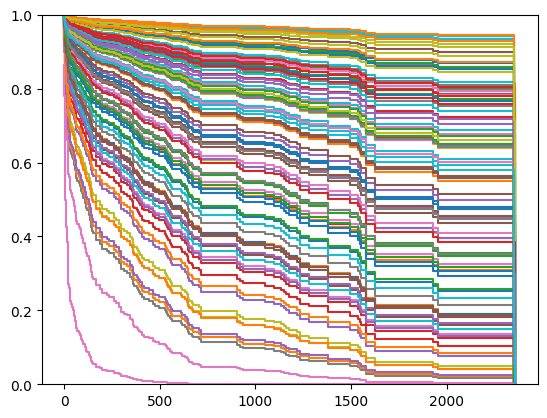

In [5]:
surv_funcs = estimator.predict_survival_function(np.array(X_test))
for fn in surv_funcs:
    plt.step(fn.x, fn(fn.x), where="post")
plt.ylim(0, 1)
plt.show()

In [6]:
estimator.score(np.array(X_test), Y_test.to_records(index=False))

/Users/jasonwang/miniforge3/envs/fair-survival/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CoxPHSurvivalAnalysis was fitted with feature names
  warnings.warn(


0.7513343799058084

In [7]:
from metrics import concordance_index_censored


In [15]:
estimator.predict(np.array(X_test)).shape
estimator.predict(np.array(X_test))

/Users/jasonwang/miniforge3/envs/fair-survival/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CoxPHSurvivalAnalysis was fitted with feature names
  warnings.warn(
/Users/jasonwang/miniforge3/envs/fair-survival/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but CoxPHSurvivalAnalysis was fitted with feature names
  warnings.warn(


array([ 1.67385678,  2.76413217,  2.63719241,  1.77224542,  1.77953385,
        2.04335713,  3.28931831,  3.99713913,  3.704157  ,  1.6222552 ,
        2.30804997,  3.10652625,  1.08713857,  2.74159315,  3.54789021,
        0.36144729,  1.65538943,  1.34761603,  2.52429155,  0.99681897,
        2.77208658,  1.18501659,  1.40275154,  1.13364286,  2.37146974,
        1.18686654,  1.20159819,  0.75489841,  1.75593842, -0.21767214,
        2.9230298 ,  2.08283369,  1.24965333,  1.47606976,  2.52364488,
        2.06202299,  4.33278003,  0.74741126,  1.79535796,  1.89828769,
        3.11196996,  3.94619957,  2.90583608,  3.41670252,  1.55657019,
        2.41103919,  2.71576952,  1.12788111,  0.09737534, -0.09210203,
        2.80853284, -0.27469882,  2.6599492 ,  3.33379555,  2.23645204,
        3.20469241,  1.1303437 ,  1.05134493,  0.46868593,  1.95346496,
        1.27497172, -0.02372539,  0.71630225,  1.20213516,  3.90993905,
        2.19066861,  1.79034491,  1.78780343,  3.75779898,  2.97